In [140]:
include("sim.jl")

simulate_pomdp (generic function with 1 method)

In [134]:
@time roadway, policy, scenes, headings, all_actions = simulate_pomdp()

"finish line" = "finish line"
r = 3016.7814285836034
  1.022316 seconds (1.95 M allocations: 111.818 MiB, 1.84% gc time)


(Roadway, heuristic_policy(9, Scene(with 0 cars)), Frame{Entity{VehicleState,VehicleDef,Int64}}[Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars)  …  Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars), Scene(with 20 cars)], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.09877232637445969, 0.09987314786338339, 0.1005825852153439, 0.10091503546813001, 0.10088545952388805, 0.10050931040668025, 0.09980246593790955, 0.09878116529061243, 0.09746194890334264, 0.0958616012683706], Any[2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  5, 5, 5, 5, 5, 2, 2, 2, 2, 2])

(get_lane(roadway, (scenes[end])[1])).tag.lane = 3
length(scenes) = 106


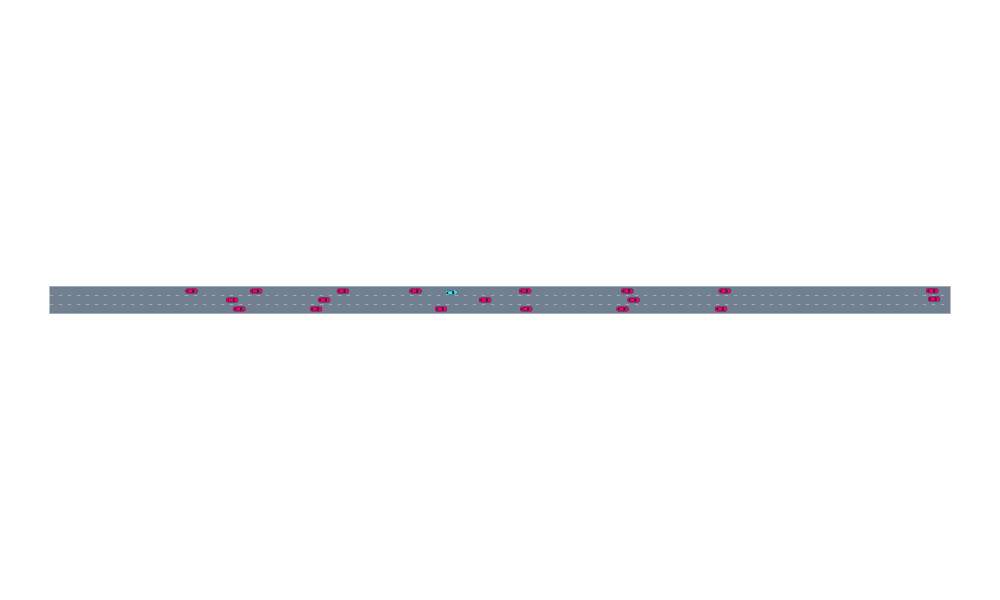

In [135]:
@show get_lane(roadway, scenes[end][1]).tag.lane
@show length(scenes)
car_colors = Dict{Int,Colorant}(1 => colorant"0x52E3F6")
AutoViz.render(scenes[end], roadway, cam = FitToContentCamera(), car_colors=car_colors) # CarFollowCamera(1)

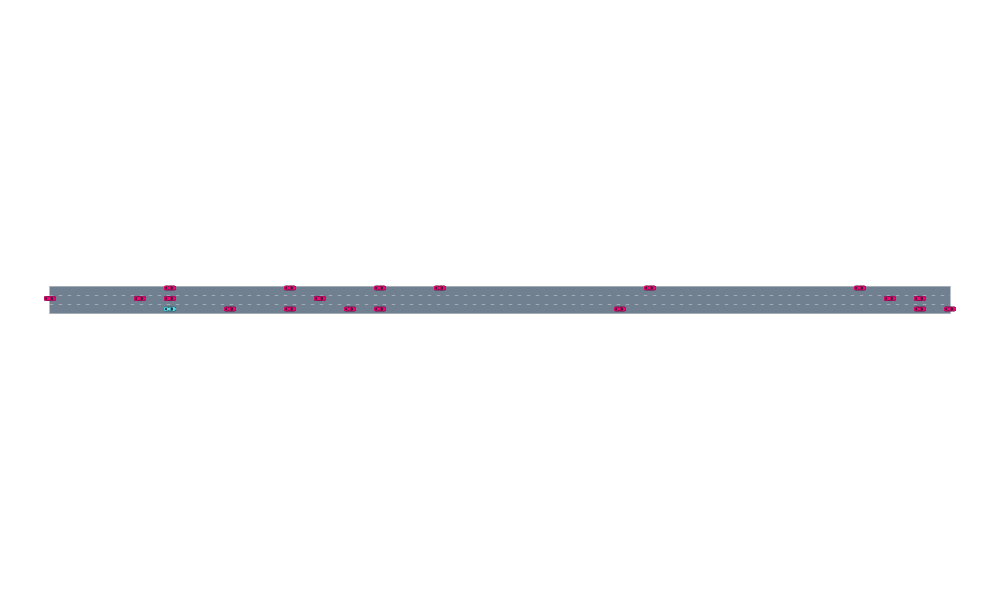

In [136]:
# car_colors = Dict{Int,Colorant}(1 => colorant"0x52E3F6")
AutoViz.render(scenes[1], roadway, cam = FitToContentCamera(), car_colors=car_colors) # CarFollowCamera(1)

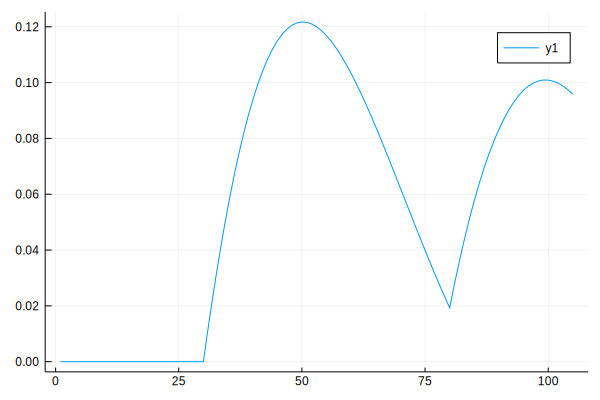

In [137]:
using Plots
plot(headings)

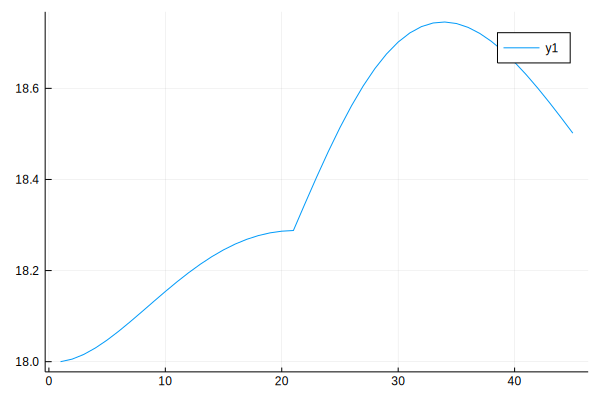

In [120]:
vels = []
for i=1:length(scenes)
    push!(vels, scenes[i][1].state.v)
end
plot(vels)

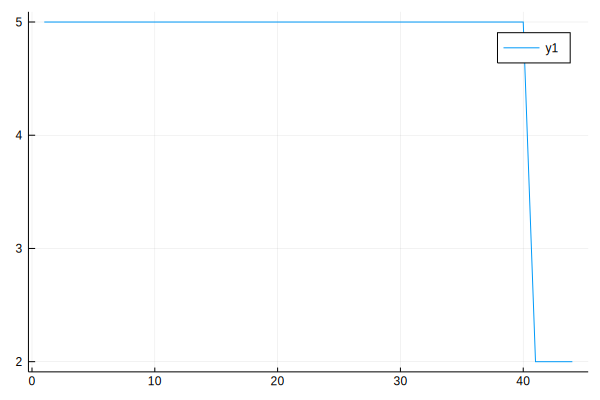

In [43]:
plot(all_actions)

In [145]:
num_goal = 0
num_fail = 0
num_collisions = 0
num_timeouts = 0
nlanes = 3
ntrials = 100
vehicle_width = scenes[end][1].def.width
lane_break_distance = DEFAULT_LANE_WIDTH / 2 - vehicle_width / 2
for i = 1:ntrials
    @time roadway, policy, scenes = simulate_pomdp()
    if get_lane(roadway, scenes[end][1].state).tag.lane == nlanes && abs(scenes[end][1].state.posF.ϕ) < pi/6 && abs(scenes[end][1].state.posF.t) < lane_break_distance
        num_goal += 1
    else
        num_fail += 1
        if collision_checker(scenes[end], EGO_ID) 
            num_collisions += 1
        else
            num_timeouts += 1
        end
    end
end

"finish line" = "finish line"
r = 2082.663722910434
  0.008790 seconds (21.44 k allocations: 3.991 MiB)
"collision" = "collision"
r = -10000.040471258548
  0.007604 seconds (18.56 k allocations: 3.547 MiB)
"finish line" = "finish line"
r = 1886.7931588379338
  0.008662 seconds (21.34 k allocations: 3.981 MiB)
"finish line" = "finish line"
r = 2199.958226205803
  0.009054 seconds (21.58 k allocations: 4.016 MiB)
"finish line" = "finish line"
r = 434.16380426988485
  0.021371 seconds (52.09 k allocations: 8.807 MiB)
"finish line" = "finish line"
r = 1886.7931588379338
  0.009014 seconds (21.45 k allocations: 3.993 MiB)
"finish line" = "finish line"
r = 2199.958226205803
  0.008118 seconds (21.34 k allocations: 3.990 MiB)
"finish line" = "finish line"
r = 1886.7931588379338
  0.007631 seconds (21.25 k allocations: 3.970 MiB)
"finish line" = "finish line"
r = 3599.9541427776717
  0.009985 seconds (26.99 k allocations: 4.904 MiB)
"finish line" = "finish line"
r = 2196.9737708503753
  0.0078

"finish line" = "finish line"
r = 2082.663722910434
  0.007460 seconds (21.57 k allocations: 4.006 MiB)
"collision" = "collision"
r = -10000.036
  0.006757 seconds (18.29 k allocations: 3.487 MiB)
"finish line" = "finish line"
r = 2799.9431493240727
  0.010109 seconds (29.75 k allocations: 5.311 MiB)
"collision" = "collision"
r = -10000.057
  0.009367 seconds (28.03 k allocations: 5.017 MiB)
"finish line" = "finish line"
r = 2199.958226205803
  0.007844 seconds (21.34 k allocations: 3.990 MiB)
"finish line" = "finish line"
r = 2082.663722910434
  0.008091 seconds (21.60 k allocations: 4.010 MiB)
"finish line" = "finish line"
r = -275.0334941168494
  0.019011 seconds (57.80 k allocations: 9.618 MiB)
"finish line" = "finish line"
r = 2121.027895099929
  0.007849 seconds (21.46 k allocations: 3.999 MiB)
"finish line" = "finish line"
r = 2082.663722910434
  0.007476 seconds (21.38 k allocations: 3.984 MiB)
"finish line" = "finish line"
r = 2082.663722910434
  0.007246 seconds (21.25 k allo

In [146]:
@show num_goal
@show num_fail
@show num_collisions
@show num_timeouts

num_goal = 86
num_fail = 14
num_collisions = 11
num_timeouts = 3


3

In [ ]:
# d 20, c 5, i 500: 2-8
# d 50, c 5, i 500: 0-10
# d 20, c 10, i 500: 3-7
# d 20, c 15, i 500: 3-7
# d 20, c 10, i 750: 0-10

In [25]:
using D3Trees
mdp = laneChangeMDP()
state = initialstate(mdp, MersenneTwister(0))
solver = MCTSSolver(n_iterations=500, depth=20, exploration_constant=10.0)
planner = solve(solver, mdp)
D3Tree(policy, planner, init_expand=2)

MethodError: MethodError: no method matching D3Tree(::DPWPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},RandomActionGenerator{MersenneTwister},MersenneTwister}, ::MCTSPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},MersenneTwister}; init_expand=2)
Closest candidates are:
  D3Tree(::Any, ::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /Users/williambrannon/.julia/packages/D3Trees/CDEyE/src/D3Trees.jl:20 got unsupported keyword argument "init_expand"
  D3Tree(!Matched::MCTSPlanner, ::Any; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:16
  D3Tree(::DPWPlanner; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:38
  ...

In [70]:
@show length(scenes)

length(scenes) = 199


199

In [82]:
@show scenes[1][2].state.v

((scenes[1])[2]).state.v = 6.9397749279404e-310


6.9397749279404e-310

In [103]:
using Reel
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, car_colors=Dict{Int,Colorant}(1 => colorant"0x52E3F6"), cam=FitToContentCamera())
    duration =size(scenes)[1]*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return AutoViz.render(scenes[frame_index], roadway, cam=cam, car_colors=car_colors)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 3 methods)

In [104]:
duration, fps, render_hist = animate_record(scenes, 0.05, roadway)
film = roll(render_hist, fps = fps, duration = duration)
write("simulation.mp4", film)

"simulation.mp4"